# Balancing Method with Cross Validation

In [ ]:
# !pip install imblearn

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, roc_auc_score, plot_roc_curve, f1_score

In [5]:
bankloan= pd.read_csv('bankloan.csv')
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [7]:
X= bankloan[['employ','debtinc','creddebt','othdebt']]
y= bankloan['default']

### Data Splitting

In [8]:
X_train_val, X_test, y_train_val, y_test= train_test_split(
    X,y,
    stratify=y,
    test_size=0.2,
    random_state=1899
)

## Resampling: SMOTE

In [9]:
smote=SMOTE()
model= LogisticRegression()

estimator= Pipeline([('balancing',smote),('model',model)])

In [11]:
skfold= StratifiedKFold(n_splits=5)
model_cv= cross_val_score(estimator, X_train_val,y_train_val, cv=skfold, scoring='f1')

In [12]:
print('cv score:', model_cv)
print('cv score mean', model_cv.mean())

cv score: [0.53164557 0.59459459 0.60869565 0.76190476 0.52173913]
cv score mean 0.603715941745661


## Algo Based: Penalized

In [13]:
model= LogisticRegression(class_weight='balanced')
skfold= StratifiedKFold(n_splits=5)
model_cv=cross_val_score(model, X_train_val,y_train_val,cv=skfold,scoring='f1')

In [14]:
print('cv score:', model_cv)
print('cv score mean', model_cv.mean())

cv score: [0.56097561 0.60273973 0.60869565 0.76190476 0.52173913]
cv score mean 0.6112109760593905


From cross validation result, the better model is penalized!

# Combining balancing method with Hyperparameter Tunning

In [20]:
smote= SMOTE(random_state=1899)
model= LogisticRegression()
estimator= Pipeline([('balancing',smote),('model',model)])

In [21]:
hyperparam_space={
    'balancing__k_neighbors':[2,5,10,15,20],
    'model__C':[100, 10, 1, 0.1, 0.01, 0.001],
    'model__solver':['liblinear','newton-cg']
}

skfold=StratifiedKFold(n_splits=5)

In [22]:
grid_search=GridSearchCV(
    estimator,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='f1',
    n_jobs=-1
)

In [23]:
grid_search.fit(X_train_val,y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('balancing', SMOTE()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'balancing__k_neighbors': [2, 5, 10, 15, 20],
                         'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'model__solver': ['liblinear', 'newton-cg']},
             scoring='f1')

In [24]:
print('best score', grid_search.best_score_)
print('best pamar', grid_search.best_params_)

best score 0.6214917921584588
best pamar {'balancing__k_neighbors': 20, 'model__C': 100, 'model__solver': 'liblinear'}


## Before tunning

In [26]:
smote= SMOTE(random_state=1899)
model= LogisticRegression()
estimator= Pipeline([('balancing',smote),('model',model)])

In [27]:
estimator.fit(X_train_val,y_train_val)
y_pred= estimator.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       103
           1       0.53      0.86      0.66        37

    accuracy                           0.76       140
   macro avg       0.74      0.80      0.74       140
weighted avg       0.83      0.76      0.78       140



## After Tunning

In [30]:
grid_search.best_estimator_.fit(X_train_val,y_train_val)
y_pred=grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.71      0.82       103
           1       0.53      0.92      0.67        37

    accuracy                           0.76       140
   macro avg       0.75      0.81      0.74       140
weighted avg       0.85      0.76      0.78       140



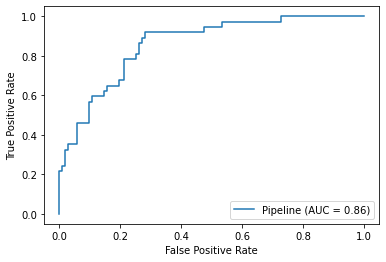

In [31]:
plot_roc_curve(estimator,X_test,y_test)

In [ ]:
Setelah hyperparameter tunning, nilai f1 meningkat dari 0.66 menjadi 0.67

## Exercise

Masih menggunakan dataset Bankloan dan fitur yang sama:  

* Coba bandingkan performa berbagai macam model dan metode balancing
* Carilah model dengan performa terbaik! Jangan lupa untuk mengimprove model dengan hyperparameter tunning.

Commit file latihan kalian ke repository github **Latihan Mentoring**. Email link github kalian ke Brigita.gems@gmail.com untuk feedback.

In [32]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, roc_auc_score, plot_roc_curve, f1_score

In [ ]:
## Basic models

In [33]:
def evaluate(models,scoring):

    model_name=[]
    scores=[]
    score_std=[]
    for name, model in models:
        model = model
        # estimator = Pipeline([
        #     ('preprocess', transformer),
        #     ('model', model)])

        skfold=StratifiedKFold(n_splits=5)
        score= cross_val_score(model,X_train_val,y_train_val,scoring=scoring,cv=skfold).mean()
        std= cross_val_score(model,X_train_val,y_train_val,scoring=scoring,cv=skfold).std()
        scores.append(score)
        score_std.append(std)
        model_name.append(name)

    return pd.DataFrame({'Name': model_name,'score':scores, 'score_std':score_std})

In [45]:
models = [
    ['Log Regression', LogisticRegression()],
    ['DecisionTree', DecisionTreeClassifier(max_depth=3,random_state=2020)],
    ['KNeighbours', KNeighborsClassifier(n_neighbors = 2)]]

In [35]:
evaluate(models,'f1')

,Name,score,score_std
0,Log Regression,0.563146,0.087313
1,DecisionTree,0.524517,0.052215
2,KNeighbours,0.333881,0.126996


In [ ]:
# With Balancing

In [38]:
def evaluate_smote(models,scoring):

    model_name=[]
    scores=[]
    score_std=[]
    for name, model in models:
        model = model
        estimator = Pipeline([
            ('balancing', SMOTE()),
            ('model', model)])

        skfold=StratifiedKFold(n_splits=5)
        score= cross_val_score(estimator,X_train_val,y_train_val,scoring=scoring,cv=skfold).mean()
        std= cross_val_score(estimator,X_train_val,y_train_val,scoring=scoring,cv=skfold).std()
        scores.append(score)
        score_std.append(std)
        model_name.append(name)

    return pd.DataFrame({'Name': model_name,'score':scores, 'score_std':score_std})

In [39]:
evaluate_smote(models,'f1')

,Name,score,score_std
0,Log Regression,0.613867,0.073876
1,DecisionTree,0.550545,0.051333
2,KNeighbours,0.384318,0.135650


In [40]:
def evaluate_NM(models,scoring):

    model_name=[]
    scores=[]
    score_std=[]
    for name, model in models:
        model = model
        estimator = Pipeline([
            ('balancing', NearMiss()),
            ('model', model)])

        skfold=StratifiedKFold(n_splits=5)
        score= cross_val_score(estimator,X_train_val,y_train_val,scoring=scoring,cv=skfold).mean()
        std= cross_val_score(estimator,X_train_val,y_train_val,scoring=scoring,cv=skfold).std()
        scores.append(score)
        score_std.append(std)
        model_name.append(name)

    return pd.DataFrame({'Name': model_name,'score':scores, 'score_std':score_std})

In [41]:
evaluate_NM(models,'f1')

,Name,score,score_std
0,Log Regression,0.519578,0.038338
1,DecisionTree,0.486989,0.037343
2,KNeighbours,0.396859,0.049293


In [44]:
# Penalty

models_penalty = [
    ['Log Regression', LogisticRegression(class_weight='balanced')],
    ['DecisionTree', DecisionTreeClassifier(max_depth=3,random_state=2020, class_weight='balanced')]]

In [46]:
evaluate(models_penalty,'f1')

,Name,score,score_std
0,Log Regression,0.611211,0.081628
1,DecisionTree,0.533400,0.046114


Logistic Regression is better,but I want to see how Decision Tree with SMOTE will preform after tunning

In [47]:
smote= SMOTE(random_state=1899)
model= DecisionTreeClassifier(max_depth=3)
estimator= Pipeline([('balancing',smote),('model',model)])

In [65]:
hyperparam_space={
    'balancing__k_neighbors':[2,5,10,15,20],
    'model__max_depth':[2,5,7,10],
    'model__min_samples_leaf':[1,5,10,20,50,100],
    'model__min_samples_split':[1,5,10,20,50,100],
    'model__criterion':['gini','entropy']
}


skfold=StratifiedKFold(n_splits=5)

In [66]:
grid_search=GridSearchCV(
    estimator,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='f1',
    n_jobs=-1
)

In [67]:
grid_search.fit(X_train_val,y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('balancing', SMOTE(random_state=1899)),
                                       ('model',
                                        DecisionTreeClassifier(max_depth=3))]),
             n_jobs=-1,
             param_grid={'balancing__k_neighbors': [2, 5, 10, 15, 20],
                         'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [2, 5, 7, 10],
                         'model__min_samples_leaf': [1, 5, 10, 20, 50, 100],
                         'model__min_samples_split': [1, 5, 10, 20, 50, 100]},
             scoring='f1')

In [64]:
estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'balancing', 'model', 'balancing__k_neighbors', 'balancing__n_jobs', 'balancing__random_state', 'balancing__sampling_strategy', 'model__ccp_alpha', 'model__class_weight', 'model__criterion', 'model__max_depth', 'model__max_features', 'model__max_leaf_nodes', 'model__min_impurity_decrease', 'model__min_impurity_split', 'model__min_samples_leaf', 'model__min_samples_split', 'model__min_weight_fraction_leaf', 'model__presort', 'model__random_state', 'model__splitter'])

In [68]:
print('best score', grid_search.best_score_)
print('best pamar', grid_search.best_params_)

best score 0.571532673539133
best pamar {'balancing__k_neighbors': 5, 'model__criterion': 'entropy', 'model__max_depth': 5, 'model__min_samples_leaf': 100, 'model__min_samples_split': 5}


In [73]:
smote= SMOTE(random_state=1899)
nearmiss= NearMiss()
model1= DecisionTreeClassifier(max_depth=3)
model2=LogisticRegression()
estimator= Pipeline([('balancing',smote),('model',model1)])

In [72]:
hyperparam_space={
    'balancing':[smote,nearmiss],
    'model':[model1,model2]}


skfold=StratifiedKFold(n_splits=5)

In [74]:
grid_search=GridSearchCV(
    estimator,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='f1',
    n_jobs=-1
)

In [75]:
grid_search.fit(X_train_val,y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('balancing', SMOTE(random_state=1899)),
                                       ('model',
                                        DecisionTreeClassifier(max_depth=3))]),
             n_jobs=-1,
             param_grid={'balancing': [SMOTE(random_state=1899), NearMiss()],
                         'model': [DecisionTreeClassifier(max_depth=3),
                                   LogisticRegression()]},
             scoring='f1')

In [76]:
grid_search.best_score_

0.6084865568480782

In [77]:
grid_search.best_params_

{'balancing': SMOTE(random_state=1899), 'model': LogisticRegression()}

In [79]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_balancing,param_model,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025531,0.003432,0.005584,0.001196,SMOTE(random_state=1899),DecisionTreeClassifier(max_depth=3),"{'balancing': SMOTE(random_state=1899), 'model...",0.505747,0.539326,0.525000,0.578947,0.485714,0.526947,0.031656,2
1,0.038203,0.010887,0.006676,0.003547,SMOTE(random_state=1899),LogisticRegression(),"{'balancing': SMOTE(random_state=1899), 'model...",0.550000,0.611111,0.617647,0.741935,0.521739,0.608487,0.075954,1
2,0.023534,0.005730,0.005584,0.001849,NearMiss(),DecisionTreeClassifier(max_depth=3),"{'balancing': NearMiss(), 'model': DecisionTre...",0.463158,0.493151,0.439024,0.550725,0.488889,0.486989,0.037343,4
3,0.030117,0.006160,0.004188,0.000401,NearMiss(),LogisticRegression(),"{'balancing': NearMiss(), 'model': LogisticReg...",0.470588,0.552632,0.475000,0.554217,0.545455,0.519578,0.038338,3
